In [121]:
from torch_geometric.loader import DataLoader
from torch_geometric import seed_everything
from torch_geometric.transforms import Distance, Cartesian
from imports.TrainModel import TrainModel
seed_everything(0)

from models.spline import Net as splinenet

model = splinenet().to('cuda')
model
#!rm ../data/contact_extraction2/{train,test,val}/processed/*

tm = TrainModel('/home/hussain/tactile/data/contact_extraction2/', model, n_epochs=150, transform=Cartesian(cat=False))

In [35]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_backward_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_ver

In [38]:
for m in model.modules():
    print(m)

Net(
  (conv1): SplineConv(1, 64, dim=3)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): SplineConv(64, 128, dim=3)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): SplineConv(128, 256, dim=3)
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): SplineConv(256, 512, dim=3)
  (bn4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=32768, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=2, bias=True)
)
SplineConv(1, 64, dim=3)
MeanAggregation()
Linear(1, 64, bias=False)
BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
SplineConv(64, 128, dim=3)
MeanAggregation()
Linear(64, 128, bias=False)
BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
SplineConv(128, 256, dim=3)
MeanAggregation()
Linear(

In [44]:
from torchsummary import summary
summary(model, input_size=(1, 2))

AttributeError: 'Tensor' object has no attribute 'x'

In [55]:
str(type(model)).split('.')[-1][:-2]

'Net'

In [53]:
dir(type(model))

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_call_impl',
 '_get_backward_hooks',
 '_get_name',
 '_load_from_state_dict',
 '_maybe_warn_non_full_backward_hook',
 '_named_members',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_version',
 'add_module',
 'apply',
 'bfloat16',
 'buffers',
 'children',
 'cpu',
 'cuda',
 'double',
 'dump_patches',
 'eval',
 'extra_repr',
 'float',
 'forward',
 'get_buffer',
 'get_extra_state',
 'get_parameter',
 'get_submodule',
 'half',
 'ipu',

In [9]:
import torch
data=tm.train_data.get(0).to('cuda')
data.batch = torch.tensor(len(data.x)*[0])

In [10]:
model(data)

tensor([[-0.0233, -0.0192]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [11]:
model

Net(
  (conv1): SplineConv(1, 64, dim=3)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): SplineConv(64, 128, dim=3)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): SplineConv(128, 256, dim=3)
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): SplineConv(256, 512, dim=3)
  (bn4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=32768, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=2, bias=True)
)

In [ ]:
tm.train()

training:   0%|          | 0/150 [00:00<?, ?epoch/s]

  0%|          | 0/407 [00:00<?, ?batch/s]

/home/hussain/tactile/src/imports/TrainModel.py:56: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with torch.autograd.detect_anomaly():
/home/hussain/miniconda3/envs/tactile38/lib/python3.8/site-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


  0%|          | 0/407 [00:00<?, ?batch/s]

  0%|          | 0/407 [00:00<?, ?batch/s]

  0%|          | 0/407 [00:00<?, ?batch/s]

  0%|          | 0/407 [00:00<?, ?batch/s]

  0%|          | 0/407 [00:00<?, ?batch/s]

  0%|          | 0/407 [00:00<?, ?batch/s]

  0%|          | 0/407 [00:00<?, ?batch/s]

  0%|          | 0/407 [00:00<?, ?batch/s]

  0%|          | 0/407 [00:00<?, ?batch/s]

  0%|          | 0/407 [00:00<?, ?batch/s]

  0%|          | 0/407 [00:00<?, ?batch/s]

  0%|          | 0/407 [00:00<?, ?batch/s]

  0%|          | 0/407 [00:00<?, ?batch/s]

In [59]:
from pathlib import Path
import json 

def log(self):
    #find model name
    name = str(type(self.model)).split('.')[-1][:-2]
    path = Path('results') / name
    if not path.exists():
        path.mkdir(parents=True)

    with open(path / 'training_params.json', 'w') as f:
        params = {
            'model': name,
            'extraction_used': str(self.extraction_case_dir),
            'n_epochs': self.n_epochs,
            'final_val_loss_degrees': self.val_losses[-1] * 180 / np.pi,
            'transform': self.transform,
        }

        json.dump(params, f, indent=4)

    train_log = {
        'epoch': [i for i in range(1, self.n_epochs + 1)], 
        'train_loss': self.train_losses,
        'val_loss': self.val_losses,
        'lr': self.lr
    }

    DataFrame(train_log).to_csv(path / 'train_log.csv', index=False)
    
log(tm)

AttributeError: 'TrainModel' object has no attribute 'lr'

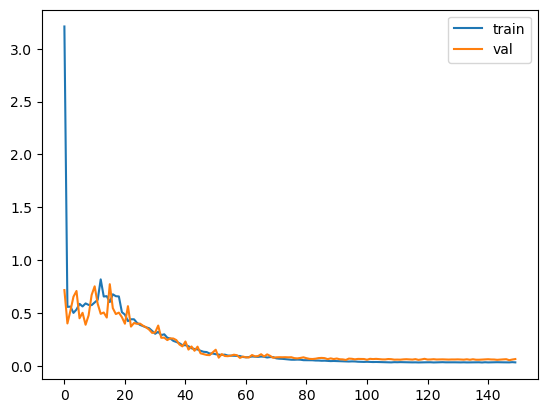

In [13]:
import matplotlib.pyplot as plt

plt.plot(tm.train_losses, label='train')
plt.plot(tm.val_losses, label='val')

plt.legend()

In [14]:
tm.train_losses[-1]

0.032039413997487005

In [110]:
np.mean(tm.val_losses)  * 180 /np.pi

9.940876719956371

(array([103.,   7.,   8.,   2.,  11.,   4.,   7.,   2.,   2.,   4.]),
 array([ 3.03066151,  7.15104644, 11.27143137, 15.3918163 , 19.51220123,
        23.63258616, 27.7529711 , 31.87335603, 35.99374096, 40.11412589,
        44.23451082]),
 <BarContainer object of 10 artists>)

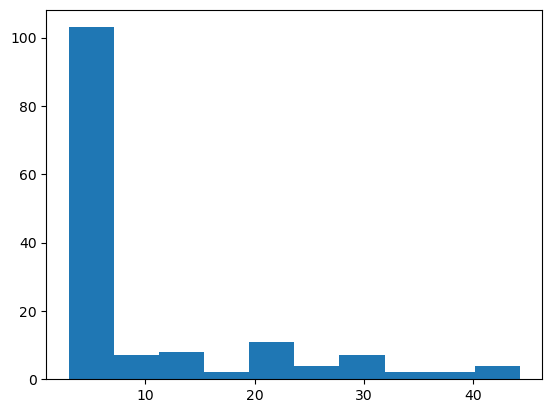

In [112]:
plt.hist(np.array(tm.val_losses) * 180 / np.pi)

In [108]:
from imports.ExtractContactCases import cases_dict
case = list(cases_dict.keys())[:-1]
angles = np.array([v for _,v in cases_dict.items()])[:-1]
case

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129]

In [97]:
angles.shape

(129, 2)

In [98]:
len(tm.val_loader)

51

In [115]:
val_loss = []
for i, data in enumerate(tm.val_loader):
    angle = data.y.numpy()

    data = data.to('cuda')
    now = time()
    end_point = tm.model(data)
    forward_time.append(time() - now)
    loss = tm.loss_func(end_point[0], data.y).detach().item()
    val_loss.append(loss)
    euc2 = np.sum((angles - angle)**2, axis=1)
    idx = np.argmin(euc2)
    print(loss * 180/np.pi, idx + 1)
                    

2.0402274508411145 4
3.621904175337899 71
3.5664044060199025 31
4.385759661826745 105
3.627621470560023 89
2.36212124637571 74
3.933117476001299 80
0.7465327393715179 19
0.5125561783379744 98
0.2656876352460318 45
3.499749230239983 37
1.4880452897030765 35
1.6823306609743238 4
2.7918152772503824 46
0.6458385154500462 28
1.2494351923696196 95
5.016471282616769 118
1.4566631317878065 29
1.379521801362919 59
5.980088457987332 127
4.619113928593876 16
7.24576007723113 81
3.713599038058497 7
1.7500449429624187 87
3.7186230690798645 103
6.716171114650436 40
2.5974084566779556 64
1.7059726137343825 59
2.9801656410197115 27
1.2154641793155034 26
4.809993383346814 104
4.377082333373067 54
0.6143532110061386 87
2.8024629018361975 101
0.8169739743857404 83
1.854415356122091 118
1.6986572676898872 42
1.6310218530423648 122
0.8156560680410452 58
4.2342460023551745 117
2.551583223432459 48
7.053470188414583 72
2.7572244245290873 103
1.9956164971639994 62
2.3164087112515186 102
0.4070525941063146 78


In [120]:
5 * 0.2

1.0

In [104]:
np.sum((angles - angle)**2, axis=-1)

array([5.62500009e-03, 3.31162361e-03, 1.60748198e-03, 5.12575170e-04,
       9.52597987e-19, 3.99999975e-04, 1.59999995e-03, 3.59999993e-03,
       5.62499991e-03, 3.51090654e-03, 2.00604783e-03, 1.11042396e-03,
       8.56355310e-04, 1.48471670e-03, 2.91307809e-03, 5.14143948e-03,
       7.33771053e-03, 4.07841629e-03, 3.14106733e-03, 2.81295321e-03,
       3.29504882e-03, 4.57372848e-03, 6.65240814e-03, 9.53108780e-03,
       1.22150975e-02, 4.92775465e-03, 4.83974404e-03, 5.36096827e-03,
       6.94481155e-03, 9.19676127e-03, 1.22487110e-02, 1.61006607e-02,
       1.95146230e-02, 5.92961754e-03, 6.84346982e-03, 8.36655695e-03,
       1.12500002e-02, 1.46500002e-02, 1.88500003e-02, 2.38500003e-02,
       2.81250003e-02, 6.93148043e-03, 8.84719560e-03, 1.13721456e-02,
       1.55551888e-02, 2.01032392e-02, 2.54512895e-02, 3.15993399e-02,
       3.67353776e-02, 7.78081877e-03, 1.05458723e-02, 1.39201607e-02,
       1.92049515e-02, 2.47262719e-02, 3.10475923e-02, 3.81689127e-02,
      

In [15]:
tm.val_losses[-1]

0.06346648323404439

In [ ]:
tm.model

In [16]:
tm.optimizer.param_groups[0]['lr'] 

1.0000000000000004e-08

In [111]:
import numpy as np
tm.val_losses[-1]*180/np.pi

3.636361629848543

In [21]:
tm.model(data)

RuntimeError: The following operation failed in the TorchScript interpreter.
Traceback of TorchScript (most recent call last):
  File "/home/hussain/miniconda3/envs/tactile38/lib/python3.8/site-packages/torch_spline_conv/weighting.py", line 8, in spline_weighting
                     basis: torch.Tensor,
                     weight_index: torch.Tensor) -> torch.Tensor:
    return torch.ops.torch_spline_conv.spline_weighting(
           ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ <--- HERE
        x, weight, basis, weight_index)
RuntimeError: x.size(1) == weight.size(1) INTERNAL ASSERT FAILED at "csrc/cuda/weighting_cuda.cu":47, please report a bug to PyTorch. Input mismatch


In [23]:
end_point[0]

tensor([-0.0507, -0.0659], device='cuda:0', grad_fn=<SelectBackward0>)

In [28]:
from time import time

loss = 0
forward_time = []
for i, data in enumerate(tm.val_loader):      
    data = data.to('cuda')
    now = time()
    end_point = tm.model(data)
    forward_time.append(time() - now)
    loss += tm.loss_func(end_point[0], data.y).detach().item()
loss /= len(tm.val_data)

loss

0.048146583861214856

In [34]:
for i, data in enumerate(tm.val_loader):      
    data = data.to('cuda')
    now = time()
    end_point = tm.model(data)
    forward_time.append(time() - now)
    loss += tm.loss_func(end_point[0], data.y).detach().item()
    
    print(f'y_true = {data.y.tolist()}, y_pred = {end_point[0].tolist()}')
loss /= len(tm.val_data)

y_true = [0.04837422072887421, 0.02003725804388523], y_pred = [-0.01320759579539299, 0.03783872723579407]
y_true = [-0.10624614357948303, -0.04400859400629997], y_pred = [-0.048981040716171265, -0.010003202594816685]
y_true = [7.04171907149247e-18, 0.11500000208616257], y_pred = [-0.029995430260896683, 0.015926769003272057]
y_true = [0.057402513921260834, -0.13858193159103394], y_pred = [0.045628033578395844, -0.03280794620513916]
y_true = [-0.057402513921260834, -0.13858193159103394], y_pred = [0.0467793308198452, -0.017826126888394356]
y_true = [-0.012341341935098171, -0.012341341935098171], y_pred = [0.009138413704931736, -0.00729153398424387]
y_true = [-0.09545941650867462, -0.09545941650867462], y_pred = [-0.03693244606256485, -0.021209578961133957]
y_true = [0.01335817202925682, 0.03224948048591614], y_pred = [0.029029974713921547, -0.02814919501543045]
y_true = [0.00667908601462841, -0.01612474024295807], y_pred = [-0.006363505497574806, 0.018351202830672264]
y_true = [-0.053033

Text(0.5, 0, 'forward inference time (s)')

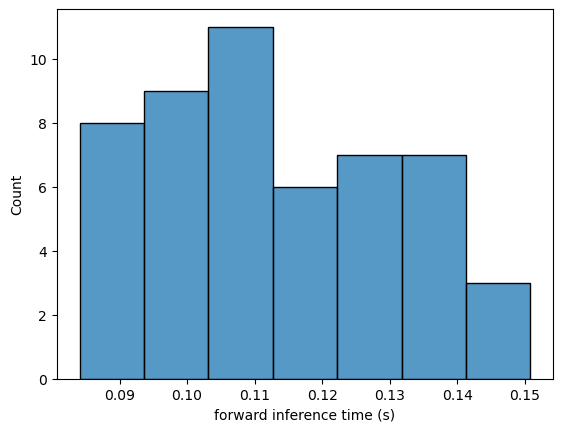

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(forward_time)
plt.xlabel('forward inference time (s)')

In [122]:
np.mean(forward_time)

0.11334554510792409

In [27]:
loss * 180 / np.pi

2.933049470632346